In [1]:
# data analysis and wrangling
import numpy as np 
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# get the data
train_df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')
gender_submission_df =pd.read_csv('../input/titanic/gender_submission.csv')

In [3]:
# view train data
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<AxesSubplot:ylabel='Frequency'>

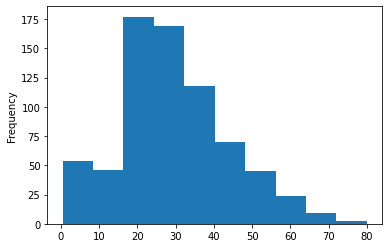

In [4]:
train_df.Age.plot.hist()

In [5]:
# view test data
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [6]:
# view submission
gender_submission_df.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


## Data Descriptions

**Survival:** 0 = No, 1 = Yes

**pclass (Ticket class):** 1 = 1st, 2 = 2nd, 3 = 3rd

**sex:** Sex

**Age:** Age in years

**sibsp:** number of siblings/spouses aboard the Titanic

**parch:** number of parents/children aboard the Titanic

**ticket:** Ticket number

**fare:** Passenger fare

**cabin:** Cabin number

**embarked:** Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

In [7]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
test_df.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [9]:
print('tain_df')
train_df.info()
print('='*50+'\n')
print('test_df')
test_df.info()
print('='*50+'\n')
print('the shape of tain_df is :', train_df.shape)
print('the shape of test_df is :', test_df.shape)
print('the shape of gender_submission_df is :', gender_submission_df.shape)

tain_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

test_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int6

In [10]:
# missing value
print('tain_df')
display(train_df.isna().sum())
print('='*50+'\n')
print('test_df')
test_df.isna().sum()


tain_df


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


test_df


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Analyze & Visualize data

0    549
1    342
Name: Survived, dtype: int64


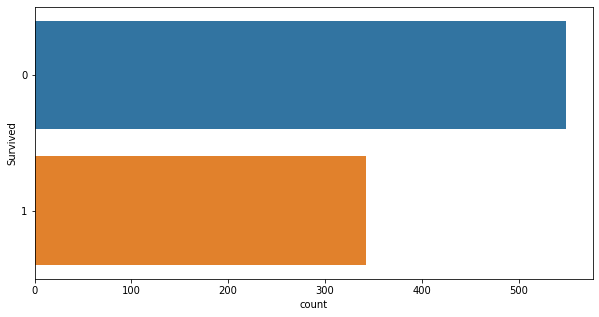

In [11]:

print(train_df.Survived.value_counts())
fig = plt.figure(figsize=(10,5))
sns.countplot(data = train_df , y='Survived');

In [12]:
train_df[['Pclass' , 'Survived']].groupby(['Pclass'],as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


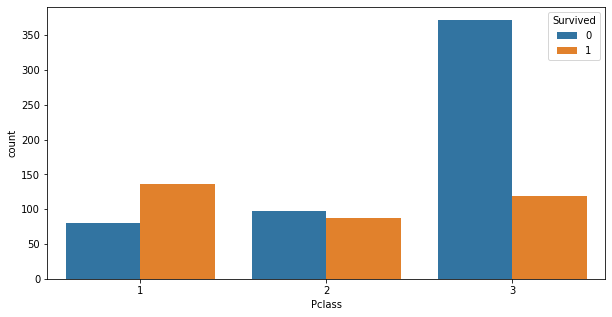

In [13]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data = train_df , x = 'Pclass' , hue ='Survived');

In [14]:
train_df[['Embarked' , 'Survived']].groupby(['Embarked'],as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


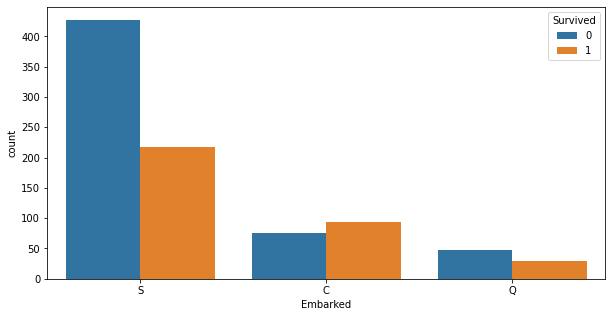

In [15]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data = train_df , x = 'Embarked' , hue ='Survived');

In [16]:
train_df[['Sex','Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


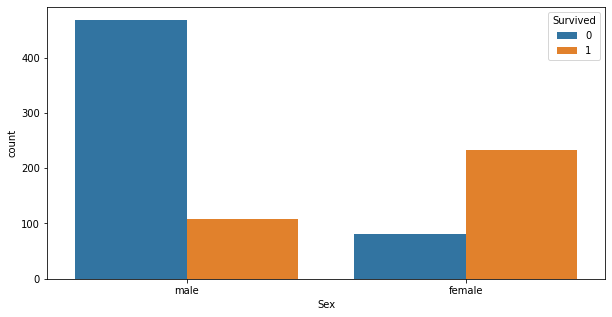

In [17]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data = train_df , x = 'Sex' , hue ='Survived');

In [18]:
train_df[['SibSp','Survived']].groupby('SibSp',as_index=False).mean().sort_values(by = 'Survived' , ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


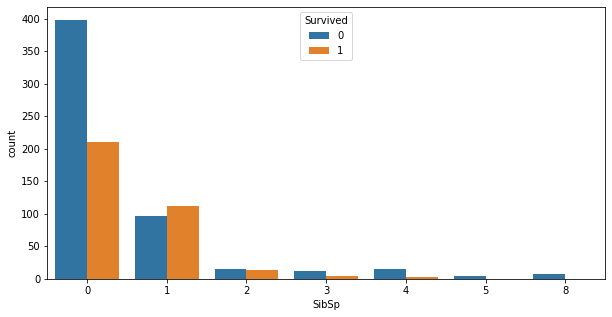

In [19]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data = train_df , x = 'SibSp' , hue ='Survived');

In [20]:
train_df[['Parch' , 'Survived']].groupby('Parch' , as_index=False).mean().sort_values(by = 'Survived' , ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


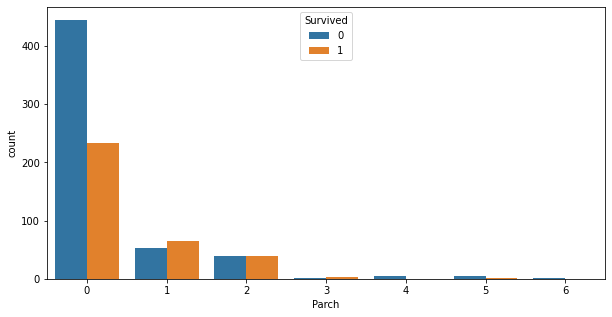

In [21]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data = train_df , x = 'Parch' , hue ='Survived')
plt.legend(title = 'Survived',loc = 'upper center');

In [22]:
train_df[['Fare', 'Survived']].groupby('Survived', as_index=False).mean()

,Survived,Fare
0,0,22.117887
1,1,48.395408


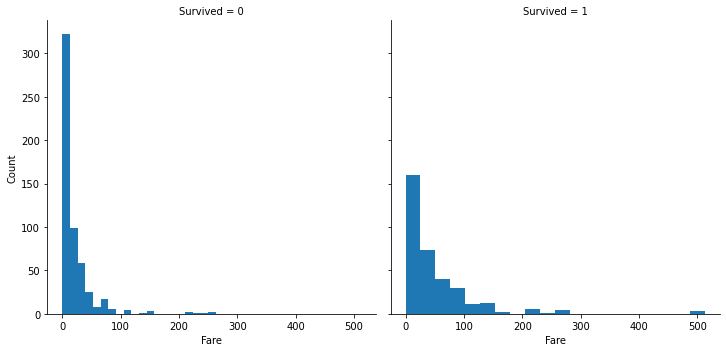

In [23]:
grid = sns.FacetGrid(train_df , col = 'Survived' , height=5)
grid.map(plt.hist , 'Fare',bins = 20 )
grid.set_ylabels('Count');

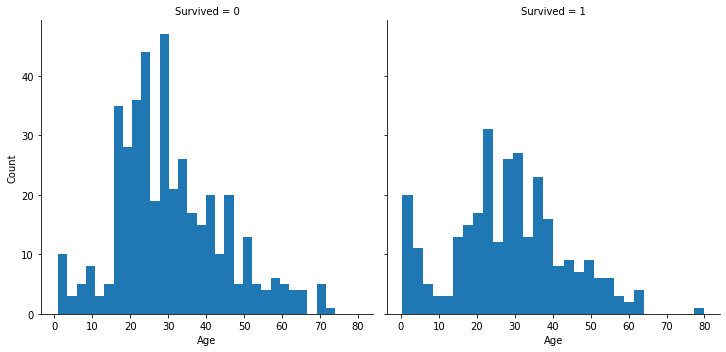

In [24]:
grid = sns.FacetGrid(train_df , col = 'Survived' , height=5)
grid.map(plt.hist , 'Age',bins = 30 )
grid.set_ylabels('Count');

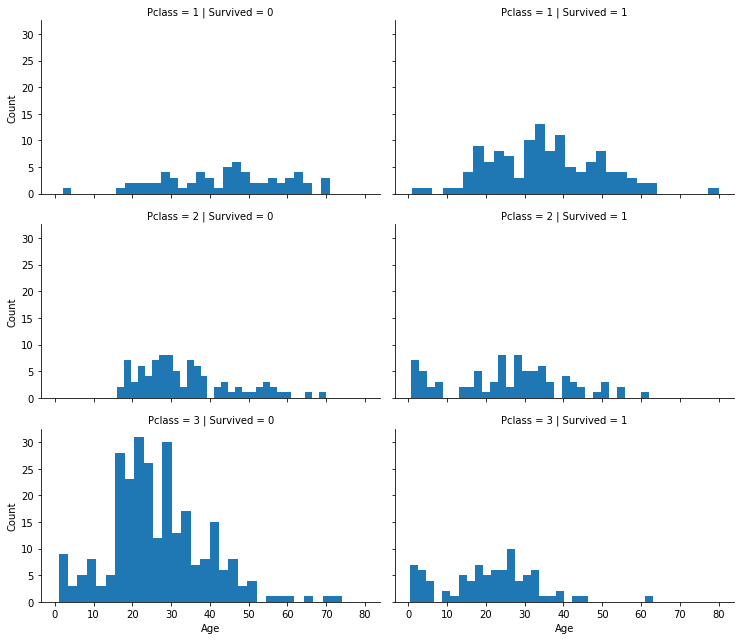

In [25]:
grid = sns.FacetGrid(train_df , col = 'Survived' , row = 'Pclass' , height = 3  , aspect=1.7)
grid.map(plt.hist , 'Age',bins = 30 )
grid.set_ylabels('Count');

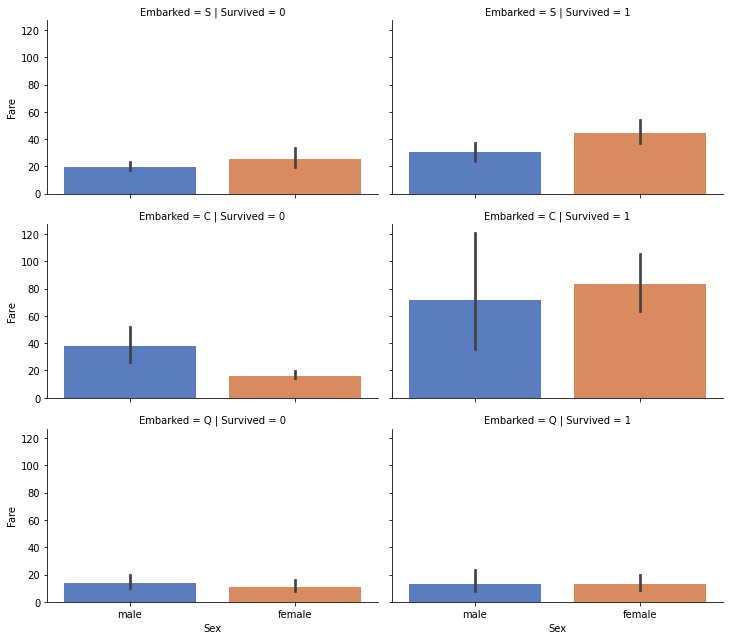

In [26]:
grid = sns.FacetGrid(train_df , col = 'Survived' , row = 'Embarked' , height = 3  , aspect=1.7)
grid.map(sns.barplot, 'Sex', 'Fare' , palette='muted' ,order = ['male' , 'female'] )
grid.add_legend();

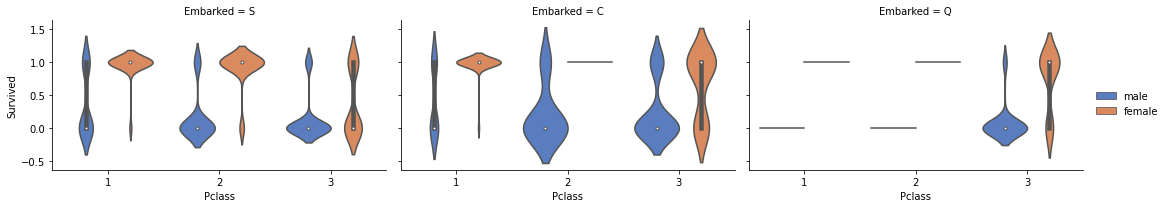

In [27]:
grid = sns.FacetGrid(train_df, col='Embarked', height = 3, aspect=1.7)
grid.map(sns.violinplot, 'Pclass', 'Survived', 'Sex', palette='muted' , order = [1,2,3] ,  hue_order =['male' , 'female'] )
grid.add_legend();


# Wrangle data

In [28]:
train_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [29]:
train_df2 = train_df.drop(['Ticket', 'Cabin' , 'Name' ,'PassengerId','Age'], axis=1)
test_df2 = test_df.drop(['Ticket', 'Cabin' , 'Name' , 'PassengerId','Age'], axis=1)
train_df2 = train_df2.dropna(subset=['Embarked'])
train_df2.head(1)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.25,S


In [30]:
train_df2['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [31]:
train_df2['Sex'] = train_df2['Sex'].map({'male':0 , 'female':1})
train_df2['Embarked'] = train_df2['Embarked'].map({'S':0 , 'C':1,'Q':2})
train_df2.head(5)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,7.2500,0
1,1,1,1,1,0,71.2833,1
2,1,3,1,0,0,7.9250,0
3,1,1,1,1,0,53.1000,0
4,0,3,0,0,0,8.0500,0


In [32]:
train_df2['Fare'].fillna(train_df2['Fare'].dropna().median() , inplace = True)
train_df2.isna().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [33]:
Pclass = pd.get_dummies(train_df2['Pclass'],prefix='Pclass')
Parch_dummy = pd.get_dummies(train_df2['Parch'],prefix='Parch')
Embarked_dummy = pd.get_dummies(train_df2['Embarked'],prefix='Embarked')
SibSp_dummy = pd.get_dummies(train_df2['SibSp'],prefix='SibSp')


In [34]:
train_df2 = pd.concat([train_df2, Pclass , Parch_dummy ,Embarked_dummy , SibSp_dummy] , axis = 1)
train_df2.head(5)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,...,Embarked_0,Embarked_1,Embarked_2,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,0,3,0,1,0,7.2500,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
1,1,1,1,1,0,71.2833,1,1,0,0,...,0,1,0,0,1,0,0,0,0,0
2,1,3,1,0,0,7.9250,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
3,1,1,1,1,0,53.1000,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
4,0,3,0,0,0,8.0500,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0


In [35]:
train_df2.drop(['Pclass'  ,'SibSp' , 'Parch' , 'Embarked'] , axis = 1 , inplace = True)

In [36]:
train_df2['Fare'] = pd.cut(train_df2['Fare'] , 5)
train_df2

,Survived,Sex,Fare,Pclass_1,Pclass_2,Pclass_3,Parch_0,Parch_1,Parch_2,Parch_3,...,Embarked_0,Embarked_1,Embarked_2,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,0,0,"(-0.512, 102.466]",0,0,1,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,1,1,"(-0.512, 102.466]",1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,1,1,"(-0.512, 102.466]",0,0,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,1,1,"(-0.512, 102.466]",1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,0,0,"(-0.512, 102.466]",0,0,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,"(-0.512, 102.466]",0,1,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
887,1,1,"(-0.512, 102.466]",1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
888,0,1,"(-0.512, 102.466]",0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
889,1,0,"(-0.512, 102.466]",1,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [37]:
Fare_dummy = pd.get_dummies(train_df2['Fare'],prefix='Fare')
Fare_dummy

,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]"
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
886,1,0,0,0,0
887,1,0,0,0,0
888,1,0,0,0,0
889,1,0,0,0,0


In [38]:
train_df2 = pd.concat([train_df2 ,Fare_dummy] , axis = 1)
train_df2

,Survived,Sex,Fare,Pclass_1,Pclass_2,Pclass_3,Parch_0,Parch_1,Parch_2,Parch_3,...,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]"
0,0,0,"(-0.512, 102.466]",0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,"(-0.512, 102.466]",1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,1,"(-0.512, 102.466]",0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,1,"(-0.512, 102.466]",1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,"(-0.512, 102.466]",0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,"(-0.512, 102.466]",0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
887,1,1,"(-0.512, 102.466]",1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
888,0,1,"(-0.512, 102.466]",0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
889,1,0,"(-0.512, 102.466]",1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [39]:
train_df2.drop('Fare' , axis = 1 , inplace = True)

# Building Machine Learning Models

In [40]:
import math, time ,random , datetime
from sklearn.model_selection import train_test_split
from sklearn import model_selection , metrics
from sklearn.linear_model import LinearRegression , LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [41]:
selected_df = train_df2
selected_df.head(5)

,Survived,Sex,Pclass_1,Pclass_2,Pclass_3,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,...,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]"
0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [42]:
X_train = selected_df.drop('Survived' , axis = 1 )
y_train = selected_df.Survived
X_train.shape , y_train.shape

((889, 26), (889,))

In [43]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    model = algo.fit(X_train,y_train)
    acc = round(model.score(X_train,y_train) *100  , 2)
    
    #cross Validation
    train_pred = model_selection.cross_val_predict(algo,
                                                  X_train,y_train,
                                                  cv = cv , n_jobs = -1)
    #cross-validation Acc metric
    acc_cv = round(metrics.accuracy_score(y_train , train_pred) *100, 2)
    
    return train_pred,acc , acc_cv

### Logistic Regression

In [44]:
start_time = time.time()
train_pred_log , acc_log , acc_cv_log = fit_ml_algo(LogisticRegression() ,
                                                    X_train, y_train ,
                                                    10)
log_time = (time.time() - start_time)
print('Accuracy: ', acc_log)
print("Accuracy CV 10-fold" , acc_cv_log)
print("Running Time" , datetime.timedelta(seconds = log_time))

Accuracy:  80.2
Accuracy CV 10-fold 79.3
Running Time 0:00:02.561355


### K-Nearest Neighbours

In [45]:
start_time = time.time()
train_pred_knn , acc_knn , acc_cv_knn = fit_ml_algo(KNeighborsClassifier() ,
                                                    X_train, y_train ,
                                                    10)
knn_time = (time.time() - start_time)
print('Accuracy: ', acc_knn)
print("Accuracy CV 10-fold" , acc_cv_knn)
print("Running Time" , datetime.timedelta(seconds = knn_time))

Accuracy:  80.76
Accuracy CV 10-fold 77.84
Running Time 0:00:00.171469


### Gaussian Naive Bayes

In [46]:
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print('Accuracy: ', acc_gaussian)
print("Accuracy CV 10-fold" , acc_cv_gaussian)
print("Running Time" , datetime.timedelta(seconds = gaussian_time))

Accuracy:  41.84
Accuracy CV 10-fold 41.51
Running Time 0:00:00.058403


### Linear Support Vector (SVC)

In [47]:
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print('Accuracy: ', acc_linear_svc)
print("Accuracy CV 10-fold" , acc_cv_linear_svc)
print("Running Time" , datetime.timedelta(seconds = linear_svc_time))

Accuracy:  80.43
Accuracy CV 10-fold 79.19
Running Time 0:00:00.167269


### Stochastic Gradient Descent

In [48]:
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print('Accuracy: ', acc_sgd)
print("Accuracy CV 10-fold" , acc_cv_sgd)
print("Running Time" , datetime.timedelta(seconds = sgd_time))

Accuracy:  78.4
Accuracy CV 10-fold 76.72
Running Time 0:00:00.147399


### Decision Tree Classifier

In [49]:
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print('Accuracy: ', acc_dt)
print("Accuracy CV 10-fold" , acc_cv_dt)
print("Running Time" , datetime.timedelta(seconds = dt_time))

Accuracy:  84.25
Accuracy CV 10-fold 80.88
Running Time 0:00:00.070433


### Gradient Boost Trees

In [50]:
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print('Accuracy: ', acc_gbt)
print("Accuracy CV 10-fold" , acc_cv_gbt)
print("Running Time" , datetime.timedelta(seconds = gbt_time))

Accuracy:  83.01
Accuracy CV 10-fold 79.75
Running Time 0:00:00.636380


## Model Results


In [51]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
5,Decision Tree,84.25
6,Gradient Boosting Trees,83.01
0,KNN,80.76
4,Linear SVC,80.43
1,Logistic Regression,80.20
3,Stochastic Gradient Decent,78.40
2,Naive Bayes,41.84


In [52]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
5,Decision Tree,80.88
6,Gradient Boosting Trees,79.75
1,Logistic Regression,79.30
4,Linear SVC,79.19
0,KNN,77.84
3,Stochastic Gradient Decent,76.72
2,Naive Bayes,41.51


In [53]:
dt_model = DecisionTreeClassifier().fit(X_train,y_train)
acc = round(dt_model.score(X_train,y_train) *100  , 2)

#cross Validation
train_pred = model_selection.cross_val_predict(DecisionTreeClassifier(),
                                              X_train,y_train,
                                              cv = 10 , n_jobs = -1)
#cross-validation Acc metric
acc_cv = round(metrics.accuracy_score(y_train , train_pred) *100, 2)
print(acc_cv)

80.76


In [54]:
dt_model.feature_importances_

array([0.56031078, 0.04583706, 0.00534105, 0.14457278, 0.01073615,
       0.03188169, 0.01843608, 0.        , 0.00208677, 0.00949952,
       0.        , 0.03981147, 0.00823332, 0.00520523, 0.03553458,
       0.00875991, 0.01798288, 0.00364552, 0.01635344, 0.        ,
       0.        , 0.01420541, 0.00625031, 0.00781097, 0.        ,
       0.00750509])

In [55]:
# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[False, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp' , figsize=(20, 10))
    return fea_imp

,imp,col
0,0.560311,Sex
3,0.144573,Pclass_3
1,0.045837,Pclass_1
11,0.039811,Embarked_0
14,0.035535,SibSp_0
5,0.031882,Parch_1
6,0.018436,Parch_2
16,0.017983,SibSp_2
18,0.016353,SibSp_4
21,0.014205,"Fare_(-0.512, 102.466]"


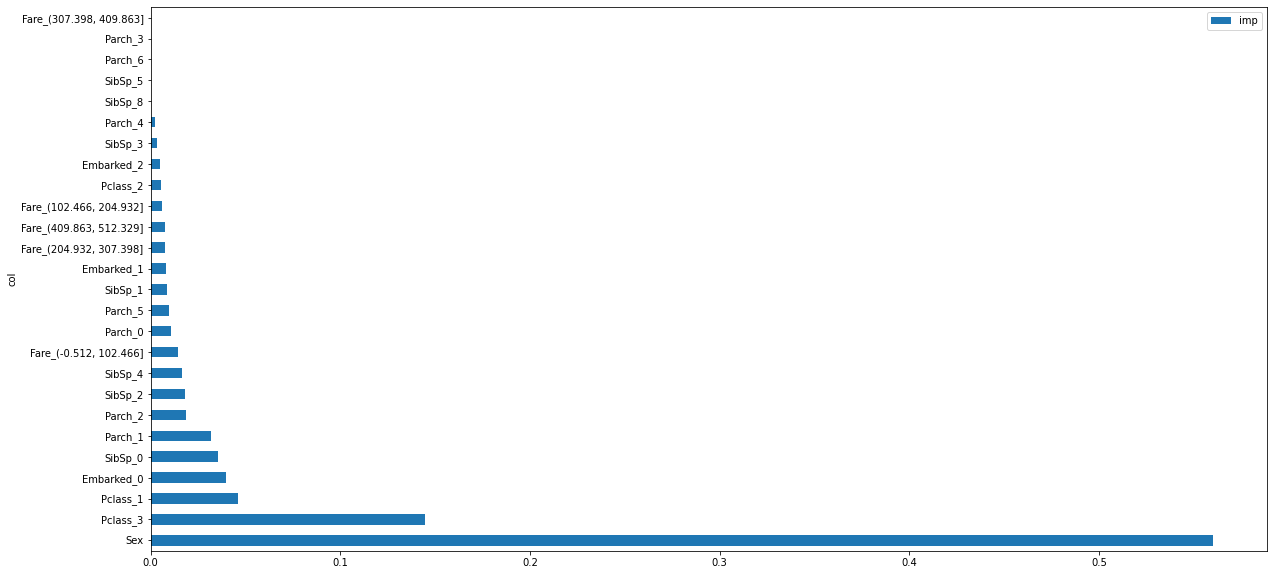

In [56]:
feature_importance(dt_model, X_train)

## Submission


In [57]:
X_train

,Sex,Pclass_1,Pclass_2,Pclass_3,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,...,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]"
0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
887,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
888,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
889,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [58]:
test_df2

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,male,0,0,7.8292,Q
1,3,female,1,0,7.0000,S
2,2,male,0,0,9.6875,Q
3,3,male,0,0,8.6625,S
4,3,female,1,1,12.2875,S
...,...,...,...,...,...,...
413,3,male,0,0,8.0500,S
414,1,female,0,0,108.9000,C
415,3,male,0,0,7.2500,S
416,3,male,0,0,8.0500,S
